In [1]:
import celldancer as cd
import anndata
import pandas as pd
import numpy as np
import scipy as sp
import os

In [2]:
adata = anndata.read_h5ad('../data/emt_sim/emt_circuit_larger_noise.h5ad')

In [4]:
adata.layers['Mu']=adata.layers['unspliced']
adata.layers['Ms']=adata.layers['spliced']

In [7]:
df = cd.adata_to_df_with_embed(adata,
                               cell_type_para='leiden',
                               embed_para='X_umap')

100%|█████████████████████████████████████████████| 9/9 [00:00<00:00, 56.28it/s]


In [8]:
df_loss , df = cd.velocity(df)

Using /Users/cliffzhou/Documents/GitHub/scTT/example_notebooks/cellDancer_velocity_2023-07-22 17-10-21 as the output path.
Arranging genes for parallel job.
9  genes were arranged to  2  portions.



Velocity Estimation: 100%|██████████| 2/2 [00:20<00:00,  8.58s/it]              
                                                                                

In [9]:
df

,cellIndex,gene_name,unsplice,splice,unsplice_predict,splice_predict,alpha,beta,gamma,loss,cellID,clusters,embedding1,embedding2
0,0,S,0.083213,0.050129,0.365039,0.067058,0.116918,5.008208,0.748831,0.048800,0,1,15.620277,4.184258
1,1,S,0.080637,0.049149,0.362890,0.065488,0.116644,5.008218,0.748895,0.048800,1,1,15.112501,3.629900
2,2,S,0.079322,0.048589,0.361795,0.064633,0.116504,5.008219,0.748933,0.048800,2,1,14.704620,3.354680
3,3,S,0.072604,0.044063,0.356239,0.058793,0.115805,5.008085,0.749277,0.048800,3,1,14.319477,3.804783
4,4,S,0.074780,0.044385,0.358059,0.059671,0.116038,5.008034,0.749267,0.048800,4,1,13.948887,3.556432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34995,4995,z,0.025027,0.289220,0.025346,0.292787,0.063275,0.001794,0.008332,0.099212,495-9,2,4.223013,-6.290294
34996,4996,z,0.024045,0.288905,0.024380,0.292286,0.063245,0.001823,0.008378,0.099212,496-9,2,4.277530,-6.117205
34997,4997,z,0.026484,0.286109,0.026774,0.290045,0.063303,0.001768,0.008291,0.099212,497-9,2,3.963720,-6.279521
34998,4998,z,0.025529,0.289239,0.025840,0.292904,0.063289,0.001780,0.008310,0.099212,498-9,2,3.557932,-6.491060


In [10]:
df = cd.compute_cell_velocity(df)

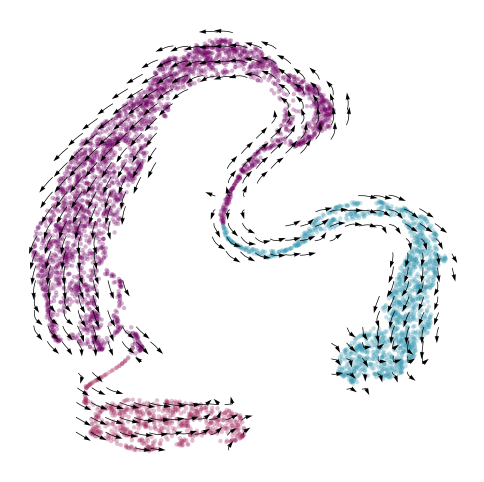

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,6))
im = cd.cdplt.scatter_cell(ax,
                        df, 
                        colors=['0','1','2'], 
                        alpha=0.3, 
                        s=10,
                        velocity=True)
ax.axis('off')
plt.show()